In [3]:
import pandas as pd

In [4]:
#applying functions to Series

titanic = pd.read_csv("titanic.csv")

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [6]:
titanic["age"] = pd.to_numeric(titanic["age"], errors="coerce")

In [7]:
titanic["fare"] = pd.to_numeric(titanic["fare"], errors="coerce")

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 143.3+ KB


In [9]:
def years_to_days(yrs):
    return yrs*365

In [10]:
titanic["age"].apply(years_to_days)
#NaN values remain.

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [11]:
#defining age groups

def get_age_group(age):
    if age < 1 :
        return "infant"
    elif age < 12 :
        return "child"
    elif age < 18 :
        return "teen"
    elif age < 60 :
        return "adult"
    else:
        return "senior"
    
    

In [12]:
#Creating a new column with the age groups

titanic["age_groups"] = titanic["age"].apply(get_age_group)

In [13]:
titanic["age_groups"].value_counts()

adult     852
senior    303
child      79
teen       63
infant     12
Name: age_groups, dtype: int64

In [14]:
survival = titanic.groupby(["age_groups","sex"])["survived"].mean()

<AxesSubplot:xlabel='age_groups'>

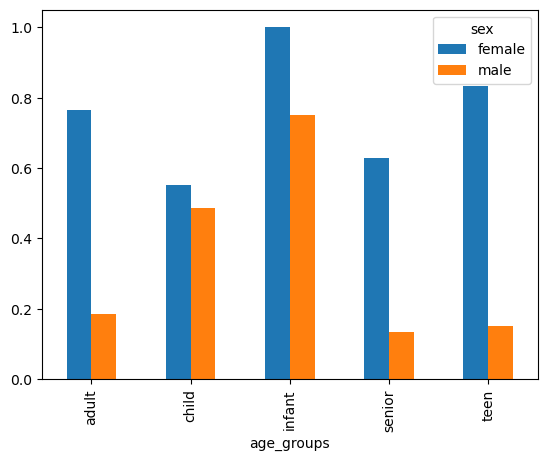

In [15]:
survival.unstack().plot(kind="bar")
#We notice a large gap between the survival rates of males and females for teenager,
#adult and senior age groups

In [16]:
#applying function to Dataframe

def get_range(s):
    return s.max() - s.min()

In [17]:
df1 = titanic[["pclass","survived","age","fare"]]


In [18]:
df1

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500
...,...,...,...,...
1304,3,0,14.5000,14.4542
1305,3,0,NaN,14.4542
1306,3,0,26.5000,7.2250
1307,3,0,27.0000,7.2250


In [27]:
df1.apply(get_range)
#by default axis= 0 / Getting the range (max-min) for all columns.

pclass        2.0000
survived      1.0000
age          79.8333
fare        512.3292
dtype: float64

In [20]:
# We can use .apply() with axis=1 to access rows. 

def get_family_size(s):
    fam_size = s["sibsp"] + s["parch"]
    if fam_size == 0 :
        return "single"
    elif fam_size < 5 :
        return "average"
    else :
        return "large"



In [21]:
#Creating a new column with the family size values
titanic["fam_size"] = titanic.apply(get_family_size,axis=1)

<AxesSubplot:xlabel='fam_size'>

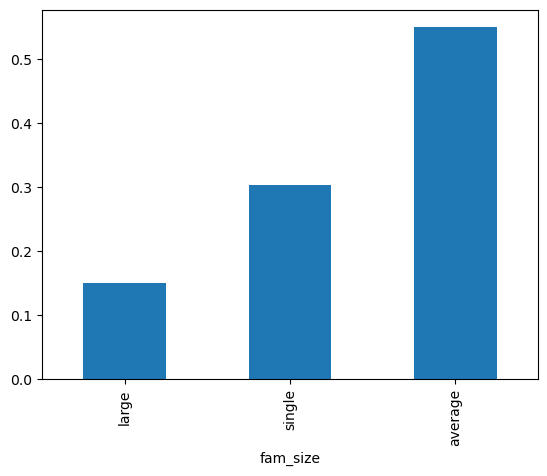

In [31]:
titanic.groupby("fam_size")["survived"].mean().sort_values().plot(kind="bar")
# People with large families had the lowest survival rate.

In [23]:
#finding all underage passengers using .map()

titanic[titanic["age"].map(lambda a : a < 18)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_groups,fam_size
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",infant,average
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",child,average
53,1,0,"Carrau, Mr. Jose Pedro",male,17.0000,0,0,113059,47.1000,?,S,?,?,"Montevideo, Uruguay",teen,single
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,4,?,"Bryn Mawr, PA",child,average
55,1,1,"Carter, Miss. Lucile Polk",female,14.0000,1,2,113760,120.0000,B96 B98,S,4,?,"Bryn Mawr, PA",teen,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3,0,"Van Impe, Miss. Catharina",female,10.0000,0,2,345773,24.1500,?,S,?,?,?,child,average
1275,3,0,"Vander Planke, Mr. Leo Edmondus",male,16.0000,2,0,345764,18.0000,?,S,?,?,?,teen,average
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0000,0,0,350406,7.8542,?,S,?,?,?,teen,single
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,?,C,?,?,?,teen,average
